# DQN Solution for the rubik's cube

In [10]:
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"*-* The device {device} will be used for this notebook.")
import numpy as np
import random
import matplotlib.pyplot as plt
from RubiksCubeEnv import RubiksCube

*-* The device cpu will be used for this notebook.


In [2]:
rubik = RubiksCube(3)
print(rubik._max_episode_steps)
print(rubik.action_space)
print(rubik.observation_space)

100
Discrete(27)
Vector(0, 5, (54,), int)


In [4]:
rubik.reset()
for i in range(60):
    a = rubik.action_space.sample()[0]
    s, r, _, _, _ = rubik.step(a)
print("shape: ", s.shape, ", min = ", s.min(), ", max = ", s.max(), ", dtype = ", s.dtype, sep='')

shape: (54,), min = 0, max = 5, dtype = int8


In [5]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity # capacity of the buffer
        self.data = []
        self.index = 0 # index of the next cell to be filled

    def append(self, s, a, r, s_, d):
        if len(self.data) < self.capacity:
            self.data.append(None)
        self.data[self.index] = (s, a, r, s_, d)
        self.index = (self.index + 1) % self.capacity

    def sample(self, batch_size):
        batch = random.sample(self.data, batch_size)
        return [torch.Tensor(np.array(x)).to(device) for x in zip(*batch)]

    def __len__(self):
        return len(self.data)

In [6]:
state_dim = rubik.observation_space.shape[0]
n_action = rubik.action_space.n
nb_neurons = 24

DQN = torch.nn.Sequential(
    nn.Linear(state_dim, nb_neurons),
    nn.ReLU(),
    nn.Linear(nb_neurons, nb_neurons),
    nn.ReLU(),
    nn.Linear(nb_neurons, n_action),
).to(device)

In [7]:
def greedy_action(network, state):
    with torch.no_grad():
        Q = network(torch.Tensor(state).unsqueeze(0).to(device))
        return torch.argmax(Q).item()

In [8]:
# build dqn agent

In [9]:
# build dqn config and run train

100
Episode   1, epsilon   0.92, batch size   100, episode return 1013.0
100
Episode   2, epsilon   0.82, batch size   200, episode return 948.0
100
Episode   3, epsilon   0.72, batch size   300, episode return 821.0
100
Episode   4, epsilon   0.62, batch size   400, episode return 1049.0
100
Episode   5, epsilon   0.53, batch size   500, episode return 969.0
100
Episode   6, epsilon   0.43, batch size   600, episode return 941.0
100
Episode   7, epsilon   0.33, batch size   700, episode return 1001.0
100
Episode   8, epsilon   0.23, batch size   800, episode return 904.0
100
Episode   9, epsilon   0.13, batch size   900, episode return 930.0
100
Episode  10, epsilon   0.03, batch size  1000, episode return 839.0
100
Episode  11, epsilon   0.01, batch size  1100, episode return 885.0
100
Episode  12, epsilon   0.01, batch size  1200, episode return 827.0
100
Episode  13, epsilon   0.01, batch size  1300, episode return 1268.0
100
Episode  14, epsilon   0.01, batch size  1400, episode r

NameError: name 'plt' is not defined

*-* Initial score 9


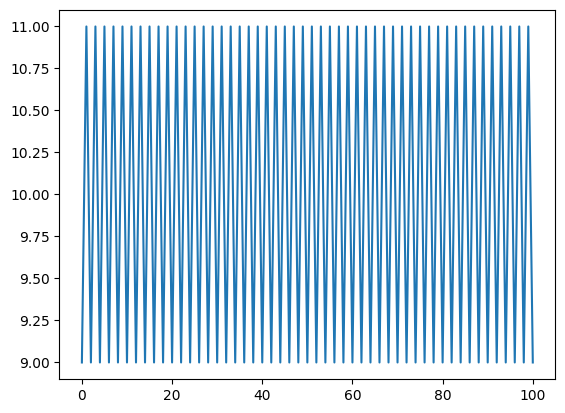

In [18]:
state,_ = rubik.reset()
terminated = False
print("*-* Initial score", rubik.reward())
rewards = [rubik.reward()]
while not terminated:
    action = greedy_action(DQN, state)
    _, reward, terminated, _, _ = rubik.step(action)
    rewards.append(reward)
plt.plot(rewards)
    